In [ ]:
import numpy as np              #Mejora el soporte para vectores y matrices
import pandas as pd             #Estructura de datos (Ciencia de datos)

import matplotlib.pyplot as plt #Para graficar
import seaborn as sns           #interfaz de alto nivel para dibujar gráficos estadísticos (basada en matplotlib)

from sklearn import metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv("https://raw.githubusercontent.com/luisFernandoCastellanosG/Machine_learning/master/Machine_Learning_Classic/Databasets/mercadeo_bancario.csv")
df

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,blue-collar,married,preschool,7,unknown,yes,no,268017,0,5,cellular,aug,thu,210,43,0,88,0
1,53,technician,married,unknown,1,no,no,no,0,0,0,cellular,nov,fri,138,0,0,14,0
2,28,management,single,university.degree,3,no,yes,no,308036,0,0,cellular,jun,thu,339,27,2,1993,1
3,39,services,married,Technological_school,1,no,no,no,0,0,4,cellular,apr,fri,185,0,0,1338,0
4,55,retired,married,preschool,2,no,yes,no,249888,0,4,cellular,aug,fri,137,2,1,1184,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,59,retired,married,Technological_school,5,unknown,no,yes,280875,0,0,telephone,jun,thu,222,33,0,664,0
41184,31,housemaid,married,preschool,1,unknown,no,no,0,0,4,telephone,may,thu,196,0,0,736,0
41185,42,admin.,single,university.degree,1,yes,yes,yes,138636,89,3,telephone,may,wed,62,46,0,43,0
41186,48,technician,married,professional.course,4,yes,no,yes,138176,72,4,telephone,oct,tue,200,19,0,1068,0


In [ ]:
df.shape #Cantidad datos

(41188, 19)

In [ ]:
df.isnull().sum()

edad                        0
trabajo                     0
estado_civil                0
educacion                   0
total_hijos                 0
credito_sin_pago            0
prestamo_vivienda           0
prestamo_personal           0
valor_prestamo              0
dias_ultimo_pago            0
tarjetas_credito            0
contacto                    0
mes                         0
dia_semana                  0
duracion_ultimo_contacto    0
dias_ultimo_contacto        0
anterior_contacto           0
numero_empleados            0
si_no                       0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


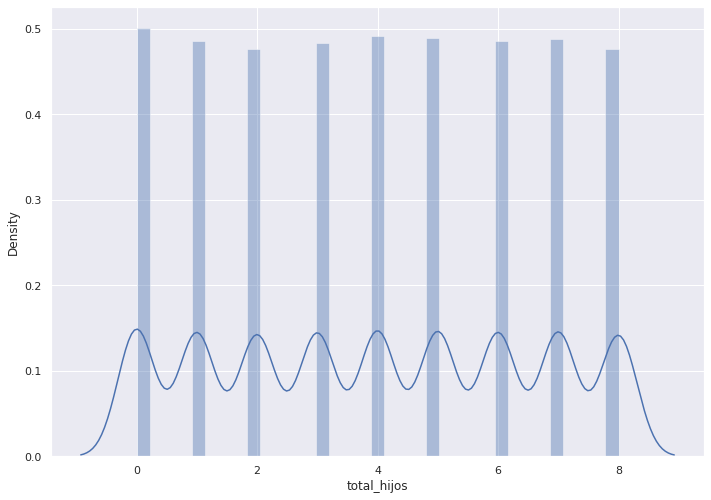

In [ ]:
sns.set(rc={'figure.figsize':(11.7,8.27)})  #tamaño del grafico
sns.distplot(df['total_hijos'])                #agregamos los datos
plt.show()

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   edad                      41188 non-null  int64 
 1   trabajo                   41188 non-null  object
 2   estado_civil              41188 non-null  object
 3   educacion                 41188 non-null  object
 4   total_hijos               41188 non-null  int64 
 5   credito_sin_pago          41188 non-null  object
 6   prestamo_vivienda         41188 non-null  object
 7   prestamo_personal         41188 non-null  object
 8   valor_prestamo            41188 non-null  int64 
 9   dias_ultimo_pago          41188 non-null  int64 
 10  tarjetas_credito          41188 non-null  int64 
 11  contacto                  41188 non-null  object
 12  mes                       41188 non-null  object
 13  dia_semana                41188 non-null  object
 14  duracion_ultimo_contac

In [ ]:
df_valores_nuevos = pd.read_csv("https://raw.githubusercontent.com/brayan-ahumada/Deep_Learning/main/Datos%20-%20Hoja%201.csv")
df_valores_nuevos.head(50)

,columna,valor,valor_nuevo
0,dia_semana,mon,0
1,dia_semana,tue,1
2,dia_semana,wed,2
3,dia_semana,thu,3
4,dia_semana,fri,4
5,prestamo_vivienda,unknown,0
6,prestamo_vivienda,yes,1
7,prestamo_vivienda,no,2
8,estado_civil,unknown,0
9,estado_civil,divorced,1


In [ ]:
valores_dia_semana = {'dia_semana':{'mon':1, 'tue':2, 'wed':3, 'thu':4, 'fri':5}}
valores_prestamo_vivienda = {'prestamo_vivienda':{'unknown':0, 'yes':1, 'no':2}}   
valores_estado_civil = {'estado_civil ':{'unknown':0, 'divorced':1, 'single':2, 'married':3}}
valores_prestamo_personal = {'prestamo_personal':{'unknown':0, 'yes':1, 'no':2}}  
valores_mes = {'mes':{'mar':0, 'apr':1, 'may':2, 'jun':3, 'jul':4, 'aug':5, 'sep':6, 'oct':7, 'nov':8,'dec':9}}
valores_contacto = {'contacto':{'cellular':0, 'telephone':1}}
valores_credito_sin_pago = {'credito_sin_pago':{'unknown':0, 'yes':1, 'no':2}} 
valores_trabajo = {'trabajo':{'blue-collar':0, 'technician':1, 'management':2, 'services':3, 'retired':4,
       'admin.':5, 'housemaid':6, 'unemployed':7, 'entrepreneur':8,
       'self-employed':9, 'unknown':10, 'student':11 }}
valores_educacion = {'educacion':{'preschool':0, 'unknown':1, 'university.degree':2,
       'Technological_school':3, 'tecnical_school':4, 'professional.course':5,
       'primary_school':6, 'illiterate':7}}   

In [ ]:
df.replace(valores_dia_semana,inplace=True)
df.replace(valores_prestamo_vivienda,inplace=True)
df.replace(valores_estado_civil,inplace=True)
df.replace(valores_prestamo_personal,inplace=True)
df.replace(valores_mes,inplace=True)
df.replace(valores_contacto,inplace=True)
df.replace(valores_credito_sin_pago,inplace=True)
df.replace(valores_trabajo,inplace=True)
df.replace(valores_educacion,inplace=True)
df.head(50)

,edad,trabajo,estado_civil,educacion,total_hijos,credito_sin_pago,prestamo_vivienda,prestamo_personal,valor_prestamo,dias_ultimo_pago,tarjetas_credito,contacto,mes,dia_semana,duracion_ultimo_contacto,dias_ultimo_contacto,anterior_contacto,numero_empleados,si_no
0,44,0,3,0,7,0,1,2,268017,0,5,0,5,4,210,43,0,88,0
1,53,1,3,1,1,2,2,2,0,0,0,0,8,5,138,0,0,14,0
2,28,2,2,2,3,2,1,2,308036,0,0,0,3,4,339,27,2,1993,1
3,39,3,3,3,1,2,2,2,0,0,4,0,1,5,185,0,0,1338,0
4,55,4,3,0,2,2,1,2,249888,0,4,0,5,5,137,2,1,1184,1
5,30,2,1,0,6,1,1,2,499476,75,1,0,4,2,68,90,0,1553,0
6,37,0,3,0,6,2,1,2,86520,0,5,0,2,4,204,66,0,442,0
7,39,0,1,4,4,2,1,2,176081,0,1,0,2,5,191,51,0,495,0
8,36,5,3,2,6,2,2,2,0,0,3,0,3,1,174,0,1,1097,1
9,27,0,2,0,3,2,1,2,323709,0,1,0,1,4,191,33,1,414,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   edad                      41188 non-null  int64
 1   trabajo                   41188 non-null  int64
 2   estado_civil              41188 non-null  int64
 3   educacion                 41188 non-null  int64
 4   total_hijos               41188 non-null  int64
 5   credito_sin_pago          41188 non-null  int64
 6   prestamo_vivienda         41188 non-null  int64
 7   prestamo_personal         41188 non-null  int64
 8   valor_prestamo            41188 non-null  int64
 9   dias_ultimo_pago          41188 non-null  int64
 10  tarjetas_credito          41188 non-null  int64
 11  contacto                  41188 non-null  int64
 12  mes                       41188 non-null  int64
 13  dia_semana                41188 non-null  int64
 14  duracion_ultimo_contacto  41188 non-nu

In [ ]:

x = df.drop('si_no', axis =1)
y = df.si_no

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=4,test_size=0.2)

In [ ]:
regresion_logistica = LogisticRegression()

In [ ]:
regresion_logistica.fit(x,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y_prediccion = regresion_logistica.predict(x_test)

In [ ]:
exactitud = metrics.accuracy_score(y_test, y_prediccion)
print("exactitud_porcentaje= "+str(100 * exactitud))

exactitud_porcentaje= 89.15999028890508


In [26]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split   
from sklearn.tree import DecisionTreeClassifier         
from sklearn.metrics import accuracy_score              
import matplotlib.pyplot as plt                        
import seaborn as sns

In [27]:
arbol = DecisionTreeClassifier()

In [48]:
X_train, X_test, y_train, y_test = train_test_split( X, y, random_state=0 )

In [66]:
arbol.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [68]:
print(X_test.iloc[0])
print(y_test.iloc[0])
#arbol.predict(X_test.iloc[0:10].values.reshape(1,-1))
arbol.predict(X_test.iloc[0:10])

edad                            51
trabajo                          0
estado_civil                     3
educacion                        4
total_hijos                      7
credito_sin_pago                 2
prestamo_vivienda                1
prestamo_personal                2
valor_prestamo              120398
dias_ultimo_pago                 0
tarjetas_credito                 2
contacto                         0
mes                              1
dia_semana                       1
duracion_ultimo_contacto       104
dias_ultimo_contacto            10
anterior_contacto                0
numero_empleados              1175
Name: 15500, dtype: int64
0


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [70]:
accuracy= arbol.score(X_test,y_test)
print(accuracy)

0.9013304846071671


In [72]:
#lista_de_profundidades (1-6)
depth_list = list(range(1,6))
#vector de accuracy
accuracy_list=[]
for depth in depth_list:
  arbol = DecisionTreeClassifier(max_depth=depth,random_state=42)
  arbol.fit(X_train,y_train)
  score= arbol.score(X_test,y_test)
  accuracy_list.append(score)

<function matplotlib.pyplot.show>

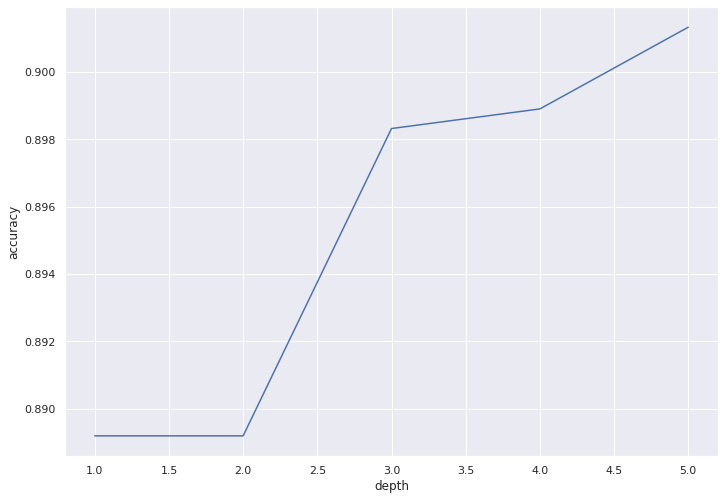

In [73]:
plt.plot (depth_list, accuracy_list)
plt.ylabel('accuracy')
plt.xlabel('depth')
plt.grid(True)
plt.show

In [74]:
arbol_clasi = DecisionTreeClassifier(max_depth = 7, random_state = 0)

arbol_clasi.fit(X_train, y_train)

accuracy = arbol_clasi.score(X_test, y_test)
print(accuracy*100)

90.5312226862193


In [75]:
X.keys()

Index(['edad', 'trabajo', 'estado_civil ', 'educacion', 'total_hijos',
       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
       'anterior_contacto', 'numero_empleados'],
      dtype='object')

In [76]:
class_names_list=list(['edad','trabajo','estado_civil ','educacion','total_hijos',
                       'credito_sin_pago', 'prestamo_vivienda', 'prestamo_personal',
                       'valor_prestamo', 'dias_ultimo_pago', 'tarjetas_credito', 'contacto',
                       'mes', 'dia_semana', 'duracion_ultimo_contacto', 'dias_ultimo_contacto',
                       'anterior_contacto', 'numero_empleados'])

from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
names = []
for i in range(len(X.keys())):
  names.append(X.keys()[i])

dot_data = export_graphviz(arbol_clasi,feature_names=names, class_names=class_names_list)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_mercadeo.png')

True